# LSSGALPY - Mollweide

## Python tool for the interactive visualization of the large-scale environment around galaxies on the 3D space.

#### This code contains the visualisation tools developed for the A&A Article Catalogues of isolated galaxies, isolated pairs, and isolated triplets in the local Universe by M. Argudo-Fernández, S. Verley, G. Bergond, S. Duarte Puertas, E. Ramos Carmona, J. Sabater, M. Fernández-Lorenzo, D. Espada, J. Sulentic, J. E. Ruiz, and S. Leon.

### How it all works

#### The code uses the interactive nature of the ipython notebook to create an interactive visualization of the LSS of galaxies in the local Universe using a Mollweide projection in combination with a wedge diagram. 

#### The following code import the needed libraries, so execute this cell first:

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

#### Run the following code to load the catalogues of galaxies that will be represented. In this case we represent the LSS by all the galaxies in the local Universe (with redshift less than 0.1) from the SDSS. We will visualize where are located isolated galaxies, isolated pairs, and isolated triplets with respect to SDSS galaxies.  We also set the default values of the visualization at redshift 0.03, with a redshift range 0.005, for the Mollweide representation. This ranges will be also shown by a red ring in the complemented wedge diagram. We select a default value of 0.2 for the transparency.

In [2]:
[ra, dec, z], [ra_isol, dec_isol, z_isol], [ra_pair, dec_pair, z_pair], [ra_trip, dec_trip, z_trip] = [np.loadtxt(filename+'.txt', usecols = (0, 1, 2), unpack=True) for filename in ['SDSS_DR10_galaxy_local', 'table1', 'table2', 'table3']]

zstart, zrange, dec0, alpha0 = .030, .005, 30., .2
ra_tot, dec_tot, z_tot = [ra, ra_isol, ra_pair, ra_trip], [dec, dec_isol, dec_pair, dec_trip], [z, z_isol, z_pair, z_trip]

#### The following code creates the representation. 

In [3]:
def plotSkymap(SDSS=True, Isolated=True, Pairs=False, Triplets=False, Opacity=alpha0, zRange=zrange, Redshift=zstart):
    plt.figure(figsize=(20, 15))
    gs = gridspec.GridSpec(1, 2, width_ratios=[4,1])
    ax1, ax2 = [plt.subplot(gs[i], polar=val) for i, val in zip(range(0, 2), [False, True])]

    cond_z_tot, cond_dec = [((zval > Redshift) & (zval < Redshift + zRange)) for zval in z_tot], (dec > -1.) & (dec <= 1.)
    cond_z = (z[cond_dec] >= Redshift) & (z[cond_dec] < Redshift + zRange)

    m = Basemap(projection='moll', lon_0=180, resolution='c', celestial=True, ax=ax1)
    m.drawmeridians(np.arange(0.,420.,60.)); m.drawparallels(np.arange(-90.,120.,30.), labels=[1,0,0,1]); m.drawmapboundary(fill_color='w')
    x, y = [[m(raval, decval)[i] for raval, decval in zip(ra_tot, dec_tot)] for i in range(0, 2)]

    xyplt = [ax1.plot(x[i][cond_z_tot[i]], y[i][cond_z_tot[i]], krgb, ms=mval, alpha=alpval, visible=visi)[0] 
             for i, krgb, mval, alpval, visi in zip(range(0, 4), ['ko', 'ro', 'go', 'bo'], [1, 4, 4, 4], 
                                                   [Opacity, .7, .7, .7], [SDSS, Isolated, Pairs, Triplets])]
    ax2.scatter(np.radians(ra[cond_dec] - 95.), z[cond_dec], c=z[cond_dec], s=1, marker=',', lw=0, alpha=.1)
    ax2.scatter(np.radians(ra[cond_dec][cond_z] - 95.), z[cond_dec][cond_z], c='r', s=1, marker=',', lw=0, alpha=1)
    ax2.bar(0., zRange, width=2*np.pi, bottom=Redshift, color='r', edgecolor='r', lw=0, alpha=.4)
    ax2.set_rmax(.1)
    [plt.setp(getval, fontsize=fontval) for getval, fontval in zip([ax2.get_xticklabels(), ax2.get_yticklabels()], [10, 8])]

    plt.show()

#### Run the following code to interact with the representation.

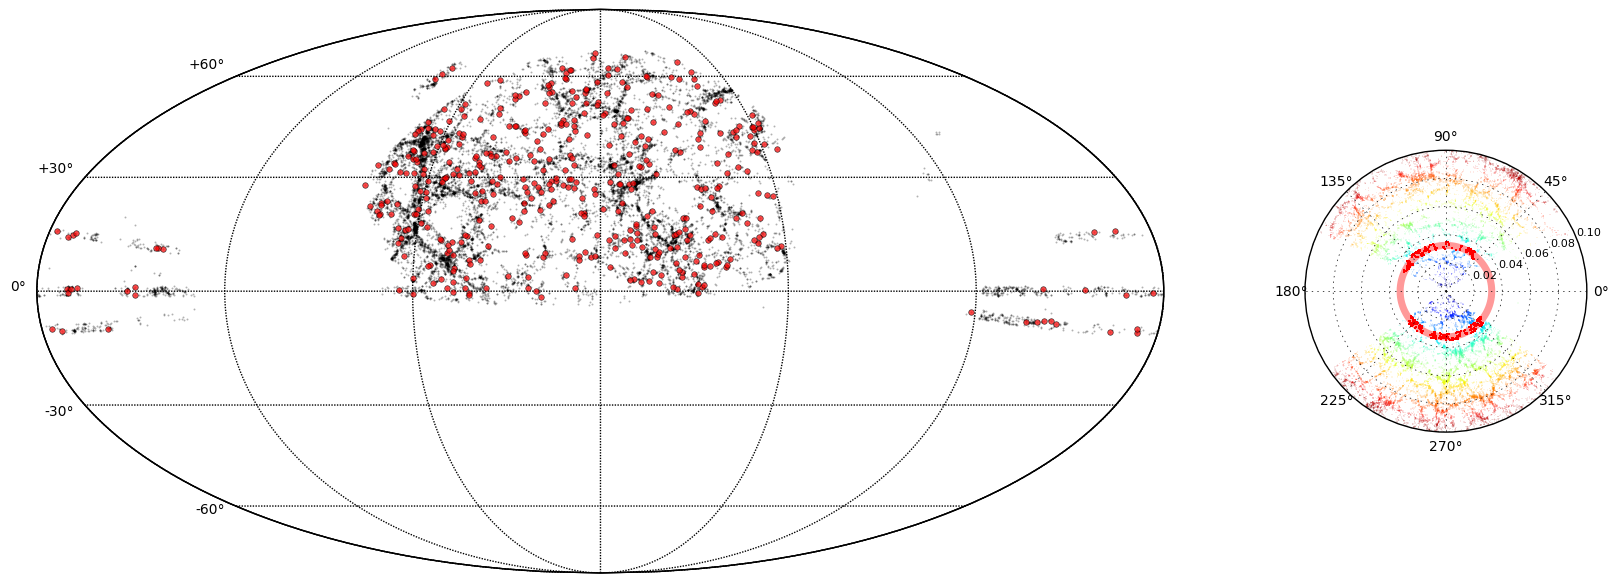

<function __main__.plotSkymap>

In [4]:
interact(plotSkymap, SDSS=True, Isolated=True, Pairs=False, Triplets=False,
         Redshift=widgets.FloatSlider(min=0.0, max=0.1, step=0.005, value=zstart),
         zRange=widgets.FloatSlider(min=0.0, max=0.1, step=0.005, value=zrange),
         Opacity=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=alpha0))